# 第7章 Matplotlib

**本章内容提要**：

- Matplotlib命名约定
- Matplotlib三种绘图场景
- Matplotlib两种应用接口
- 基本图形绘制

简单的图形可以给数据分析师带来比其他任何设备更多的信息。在上一章中，本书介绍了Python数据分析最核心的底层库NumPy、基于ndarray对象的数组操作方法与基本统计。本章将开始指引读者从更直观的角度——“图形”——了解数据的分布与规律，先学习Matplotlib的基本理念和接口，然后学习如何绘制和自定义图形。

## 7.1 Matplotlib入门

### 7.1.1 Matplotlib库简介	

数据可视化是数据分析最核心的工作之一，它既能帮助我们探索数据，如寻找异常值，也能够帮助我们汇总分析结果，即所谓的“一图胜千言”。Python有着众多的库可以进行静态或动态的数据可视化，其中最流行的是Matplotlib（<https://matplotlib.org/>）。因此，本书主要利用Matplotlib向读者介绍如何合理地选择和创建图形。

Matplotlib库的历史并不是很久远，它是John Hunter在2002年启动的一个项目，目的是为Python构建商业科学计算软件MATLAB的绘图接口，在2003年发布了0.1版本（实验版本）。Matplotlib的最重要特点是它可以很好地与许多的操作系统和图形后端工作，这意味着我们可以不管使用什么操作系统或是想要什么输出格式的图形（PDF、JPG、PNG、GIF等）都可以依靠它。这种跨平台，一切皆可用的特性成为了Matplotlib最大的长处，并为Matplotlib带来了大量的基础用户和活跃的开发者。

目前，Matplotlib已经和IPython合作，简化了在IPython Shell和Jupyter Notebook中进行交互式绘图的方式。除此之外，Python社区出现了许多以Matplotlib为底层的可视化计算库，其中最有名的是Seaborn（<https://seaborn.pydata.org/>），在本书后续的章节我们会学习它。

### 7.1.2 命名约定

在深入了解如何使用Matplotlib创建图形之前，本书先向读者介绍一些Python科学计算社区通用的命名约定。

在导入NumPy包时，我们使用Python社区约定的np替代numpy。这里，我们也使用Matplotlib的一些标准简写用于导入。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Python用户基本上绘图只会用到pyplot子模块中的功能特性，因此plt是使用Matplotlib绘图最常用的简写。

### 7.1.3 如何展示图形

Matplotlib最佳的使用方法依赖于用户如何使用它，通常有3种应用绘图的场景：脚本、IPython Shell和Jupyter Notebook。

#### 使用脚本绘制

读者如果想要在脚本中使用Matplotlib，通常使用plt.show()函数。该函数会寻找当前活跃的所有图形队形，打开一个或多个交互式的窗口展示图形。

假设下面是代码文件plot.py的内容：

```python
# -*- coding: utf-8 -*- 

# 导入模块/包
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.linspace(0, 10, 200)

# 绘制图形
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

# 显示图形
plt.show()
```

接下来在终端中运行该脚本，读者将看到一个显示图形的窗口弹出来。在此处，plt.show()函数在后台进行了多项工作，它与系统的交互式图形后端进行交流，而Matplotlib向我们隐藏了所有的细节。

```
$ python plot.py
```

![图7-1 弹出的图形](images/chapter7/Figure_1.png)

注意，如果是编写脚本文件进行绘图，一个文件尽量只使用一次plt.show()函数，如果使用多次，图形后端行为将变得不可预测。

#### 从IPython Shell绘制

在IPython Shell中使用Matplotlib非常方便，读者如果指定Matplotlib模式，IPython可以工作得非常好。启动IPython后键入魔术命令“%matplotlib”能够激活该模式。 

In [2]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


这时候读者如果调用plt.plot()函数就会打开一个图形窗口，然后接下来输入的绘图指令会不断更新这个图。有时候，一些对图形属性的更改不会及时生效，读者可以利用plt.draw()函数强制执行。

#### 在Jupyter Notebook中绘制

在Jupyter Notebook中使用Matplotlib进行交互式绘图也是使用魔术命令“%matplotlib”，它跟在IPython Shell中的工作方式差不多。读者可以使用以下两种选项：

* `%matplotlib notebook` 会在Notebook中嵌入交互式图形
* `%matplotlib inline` 会在Notebook张嵌入静态图形

最常使用的是第二种方式。

In [3]:
%matplotlib inline

运行这条命令后，Notebook任何创建图形的单元格都会嵌入对应的PNG图形。例如，下面创建了一幅跟刚才执行python脚本类似的图形，不过这里略微修改了绘图数据的并设置了线条的类型。

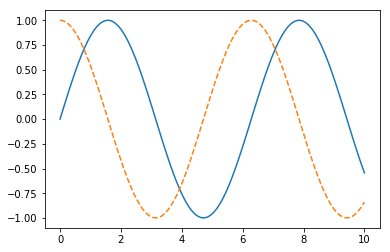

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()  # 生成一个空白图形并将其赋给fig对象
plt.plot(x, np.sin(x), '-')   # 绘制实线
plt.plot(x, np.cos(x), '--')  # 绘制虚线

请读者试试先运行%matplotlib notebook，再运行上述代码观察执行的结果。

### 7.1.4 保存图形

前面已经介绍过，Matplotlib支持各种系统和图形格式。Matplotlib的好用点还在于，保存所有图形格式的代码都是一样的，只需要调用图形对象的savefig()方法，非常简单易用。

例如，我们用png格式保存刚创建的余弦曲线图，并进行检查。

In [5]:
# 保存图形
fig.savefig("first.png")

# 调用系统命令ls检查
!ls -l first.png

-rw-r--r-- 1 wsx wsx 22604 2月  26 23:27 first.png


pdf是常见的矢量图形格式，现在我们使用一样的命令，仅改动一下保存的文件拓展名。

In [6]:
# 保存pdf矢量图
fig.savefig("first.pdf")

# 调用系统命令ls检查
!ls -l first.pdf

-rw-r--r-- 1 wsx wsx 8519 2月  26 23:27 first.pdf


读者不妨使用pdf阅读器打开该文件看看。

下面代码结果列出Matplotlib支持的所有图形格式：

In [7]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

注意，由于不同读者使用的操作系统以及安装的图形后端都可能不同，因此支持的图形格式可能也会有所变化，因而如果与上述输出不一致也是正常的。

### 7.1.5 两种绘图接口

在前面的几小节中，我们使用类似MATLAB的命令操作方式进行图形的创建工作。除了这种操作方式，Matplotlib还提供了比较原生的Python方式操作图形：这种方式把每一个图形都看作一个对象，读者可以通过对象方法的调用达到图形元素增改的目的。

MATLAB操作方式非常地简便，而面向对象的方式则功能强大。大多数数据分析师或数据科学家在代码中往往同时使用两者，因此代码阅读时容易产生困惑。本小节对两种绘图接口进行简要介绍，帮助读者理清它们的区别。

#### MATLAB风格接口

MATLAB风格接口由plt模块提供，plt包含一系列绘图命令（函数），名称与MATLAB基本一致。下面展示了如何利用plt快速绘制包含两个子图的图形：

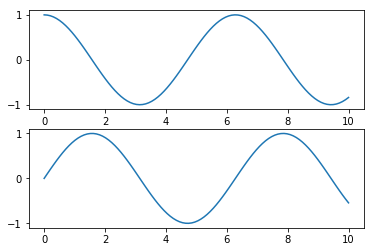

In [8]:
# 创建一个图形
plt.figure()

# 创建两个子图面板
# 创建第1个子图
plt.subplot(2, 1, 1) 
plt.plot(x, np.cos(x))  # 绘制图形

# 创建第2个子图
plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))  # 绘制图形

这里使用了3个命令，每一个都非常简明：

- figure()函数创建一个空白图形
- subplot(rows, columns, subplot_number)函数创建子图，第1个参数设定子图行数，第2个参数设定子图列数，第3个参数设定子图序号
- plot(x, y)函数绘制图形，第1个参数为x轴提供数据，第2个参数为y轴提供数据

对于简单的图形来说，这种接口是极好的，它既快又简单。然而，如果绘制的图形比较复杂，可能就不适应或者出问题了。例如，当我们在操作第2个子图的时候，想要对已经绘制的第1个子图进行增删改，该怎么办？MATLAB风格的接口不可能完成这个任务。不过，我们还有更好的办法——面向对象接口。

#### 面向对象接口

面向对象接口可以应对更为复杂的绘图场景，它通过图和坐标轴等图形对象方法的调用来实现各种绘图操作。

现在，我们用面对对象接口实现刚才的图形。

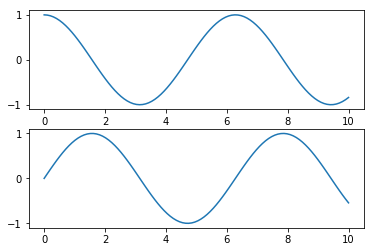

In [10]:
# 首先创建一个图形网格
fig, ax = plt.subplots(2)

# 在坐标轴对象上调用plot()方法
ax[0].plot(x, np.cos(x))
ax[1].plot(x, np.sin(x))

这里subplot()函数返回一个元组，其中第2个元素是一个包含坐标轴对象的数组，在坐标轴对象上调用方法即可绘制、修改图形。

可以看到，两种接口绘制图形的操作都比较简单。对于简单的图形，选择哪一种接口取决于读者的喜好。至于绘制复杂的图形，还是需要掌握面向对象的接口。

## 7.2 基本图形绘制

上一节本书向读者介绍了Matplotlib的绘图场景以及绘图接口，这一节我们接着学习常见图形的绘制，包括线图、散点图、直方图、饼图等。

### 7.2.1 线图

线图常常用来表示某个变量随另一个变量变化的趋势，如金融领域中的经济走势图、医院中的心电图。

### 7.2.2 散点图

### 条形图

### 7.2.3 直方图

### 7.2.4 饼图

### 7.2.5 箱线图


## 自定义图形

#### 设置风格

使用plt.style()函数可以为创建的图形设置合适的美学风格。下面代码可以确保生成的图形使用经典的Matplotlib风格：

plt.style.use('classic')

## 7.4 章末小结